# **Task C**

In [7]:
from zipfile import ZipFile
file_name= "assignment_nn_material-4.zip"
with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Done')

Done


In [8]:
import assignment_ann as a4
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets

signal_dataset = a4.SignalDataset() # Provides back a PyTorch Dataset OBJECT!
print(signal_dataset)
size_of_signal_dataset = len(signal_dataset) # Print size of whole dataset
print(size_of_signal_dataset)


# Making a PyTorch DataLoader Object specifically for your Signal dataset that you got above.
signal_dataloader = DataLoader(dataset=signal_dataset, batch_size=200, shuffle=True)

1384


torch.Size([200, 500]) torch.Size([200])


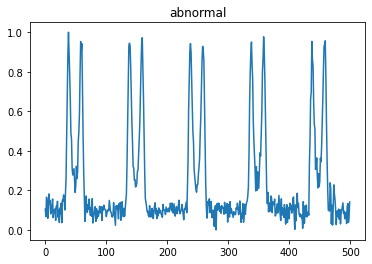

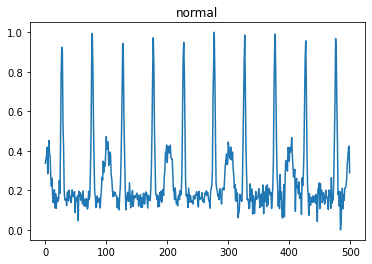

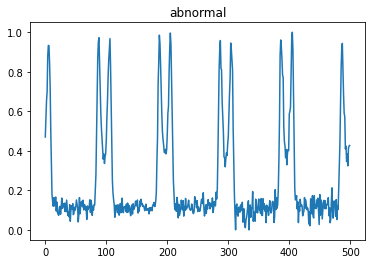

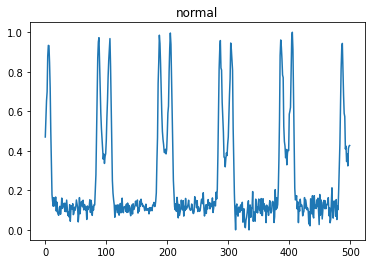

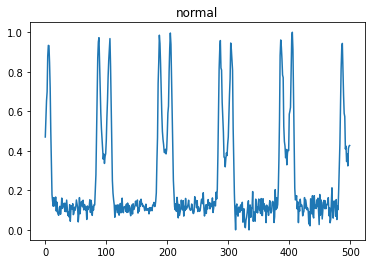

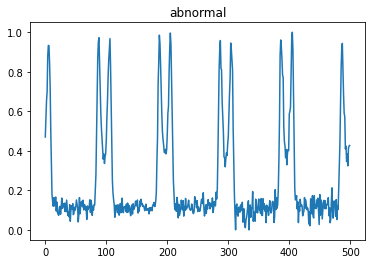

In [9]:
import matplotlib.pyplot as plt
i=0
#for signal, label in signal_dataloader:
#  print(signal.shape)
#  print(label.shape)
#  print("")
#  p
signal, label = next(iter(signal_dataloader))

print(signal.shape, label.shape)

plt.plot(signal[0])
if label[0]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()


plt.plot(signal[1])
if label[1]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()



plt.plot(signal[2])
if label[2]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()



plt.plot(signal[2])
if label[3]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()



plt.plot(signal[2])
if label[4]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()


plt.plot(signal[2])
if label[5]==0:
  plt.title("normal")
else: 
  plt.title("abnormal")
plt.show()


In [14]:
'''
count=0
for signal,label in signal_dataloader:
  print( count)
  print(f'the lenght of a signla is  {signal.shape}')
  print(f'the lenght 000 of a signla is  {signal[0].shape}')
  print(f'the label   {label.shape}')
  print(f'the label   {label}')
  print(f'the llll 000 of a signla is  {label[0]}')
  print(f'the llll 5555 of a signla is  {label[5]}')
  count=count+1
  print("******")
print( count)
'''
  

'\ncount=0\nfor signal,label in signal_dataloader:\n  print( count)\n  print(f\'the lenght of a signla is  {signal.shape}\')\n  print(f\'the lenght 000 of a signla is  {signal[0].shape}\')\n  print(f\'the label   {label.shape}\')\n  print(f\'the label   {label}\')\n  print(f\'the llll 000 of a signla is  {label[0]}\')\n  print(f\'the llll 5555 of a signla is  {label[5]}\')\n  count=count+1\n  print("******")\nprint( count)\n'

In [15]:


import pandas as pd

for signal,label in signal_dataloader:
  data = {'signal': signal, 'label': label}
  df = pd.DataFrame(data)
print( df)

 

                                                signal  label
0    (tensor(0.0912), tensor(0.1271), tensor(0.0645...      1
1    (tensor(0.1048), tensor(0.1672), tensor(0.0623...      1
2    (tensor(0.8525), tensor(0.9263), tensor(0.8304...      1
3    (tensor(0.1294), tensor(0.1955), tensor(0.0997...      1
4    (tensor(1.), tensor(0.8936), tensor(0.5852), t...      0
..                                                 ...    ...
179  (tensor(0.2703), tensor(0.2959), tensor(0.2395...      0
180  (tensor(0.1212), tensor(0.1267), tensor(0.1569...      1
181  (tensor(0.1761), tensor(0.0819), tensor(0.0780...      0
182  (tensor(0.8467), tensor(0.9159), tensor(0.7860...      0
183  (tensor(0.1006), tensor(0.1524), tensor(0.1640...      1

[184 rows x 2 columns]


In [10]:
# spliting the dataset 
original_data = signal_dataset
size_of_original_data = len(signal_dataset)
print(size_of_original_data)


train_fraction = 0.70

test_fraction=0.20
val_fraction=0.10

train_dataset_size = int(train_fraction * size_of_original_data)
test_dataset_size = int(test_fraction * size_of_original_data)
val_dataset_size = int(size_of_original_data - train_dataset_size -test_dataset_size)
# Split whole original data into train, val and test datsets
train_dataset, val_dataset,test_dataset = torch.utils.data.random_split(original_data,
                                                           [train_dataset_size,
                                                            val_dataset_size,
                                                            test_dataset_size])
# Sanity checking
print(f" Train set Size: {len(train_dataset)}")
print(f" Val set Size: {len(val_dataset)}")
print(f" test set Size: {len(test_dataset)}")

1384
 Train set Size: 968
 Val set Size: 140
 test set Size: 276


In [11]:
my_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True)


In [12]:
# fexible model:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1=nn.Linear(in_features= 500, out_features=100)
    self.l2=nn.Linear(in_features=100, out_features=20)
    #self.l3=nn.Linear(in_features=20, out_features=5)
    self.output=nn.Linear(in_features=20, out_features=2)
    

    self.relu=nn.ReLU()
    
  def forward(self,x):
    h1=self.relu(self.l1(x))
    h2=self.relu(self.l2(h1))
    #h3 = self.relu(self.l3(h2))
    output=self.output(h2)
    return output

 in epoch 0 the last cost of epoch is 0.6811839938163757
 in epoch 0 the last cost of epoch is 0.674452543258667
 in epoch 0 the last cost of epoch is 0.6776529550552368
 in epoch 0 the last cost of epoch is 0.6666114926338196
 in epoch 0 the last cost of epoch is 0.6633521318435669
 in epoch 1 the last cost of epoch is 0.666787326335907
 in epoch 1 the last cost of epoch is 0.6762291193008423
 in epoch 1 the last cost of epoch is 0.6587039828300476
 in epoch 1 the last cost of epoch is 0.650562584400177
 in epoch 1 the last cost of epoch is 0.6537128686904907
 in epoch 2 the last cost of epoch is 0.6538644433021545
 in epoch 2 the last cost of epoch is 0.6415870785713196
 in epoch 2 the last cost of epoch is 0.6764652729034424
 in epoch 2 the last cost of epoch is 0.6438846588134766
 in epoch 2 the last cost of epoch is 0.6592118144035339
 in epoch 3 the last cost of epoch is 0.6612659692764282
 in epoch 3 the last cost of epoch is 0.6465452313423157
 in epoch 3 the last cost of epoch

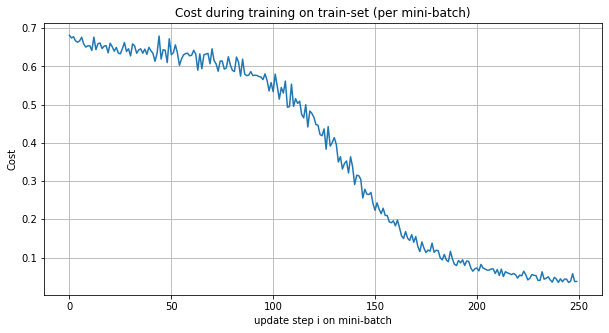

In [13]:
train_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True)


model= Model()
cost_function = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 50   # Try
for epoch_i in range(nr_epochs):
  for signal, label in train_dataloader:
    
    label_pred = model(signal)
    
    cost = cost_function(label_pred , label)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost)
    print(f' in epoch {epoch_i} the last cost of epoch is {training_minibatch_Js[-1]}')
  
  
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")    
print("*******************************") 
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score


def evaluate_model_performance( model, dataset):
  d_loader = DataLoader(dataset = dataset, batch_size=len(dataset))
  cost_function=nn.CrossEntropyLoss()
  model.eval()

  with torch.no_grad():
    for x,y in d_loader:
      raw_y_preds=model(x) 
    y_class_preds= raw_y_preds.argmax(dim=1) 
    eval_cost= cost_function(raw_y_preds, y).item()
  model.train()
  eval_acc=accuracy_score(y_pred=y_class_preds,y_true=y)


  return eval_cost, eval_acc

test_cost,test_acc= evaluate_model_performance(model=model, dataset=test_dataset)
print(f'test cost: {test_cost}')
print(f'test accuracy:{test_acc} ')

test cost: 0.6925884485244751
test accuracy:0.5471014492753623 


 in epoch 0 the last cost of epoch is 0.6812907457351685
 in epoch 0 the last cost of epoch is 0.6628759503364563
 in epoch 0 the last cost of epoch is 0.6543289422988892
 in epoch 0 the last cost of epoch is 0.6563684344291687
 in epoch 0 the last cost of epoch is 0.6669436693191528
 in epoch 1 the last cost of epoch is 0.6514644026756287
 in epoch 1 the last cost of epoch is 0.655110776424408
 in epoch 1 the last cost of epoch is 0.6557157039642334
 in epoch 1 the last cost of epoch is 0.6376184821128845
 in epoch 1 the last cost of epoch is 0.6399261951446533
 in epoch 2 the last cost of epoch is 0.6264051198959351
 in epoch 2 the last cost of epoch is 0.6451051831245422
 in epoch 2 the last cost of epoch is 0.6426311731338501
 in epoch 2 the last cost of epoch is 0.64113450050354
 in epoch 2 the last cost of epoch is 0.6481575965881348
 in epoch 3 the last cost of epoch is 0.6458322405815125
 in epoch 3 the last cost of epoch is 0.6283939480781555
 in epoch 3 the last cost of epoch

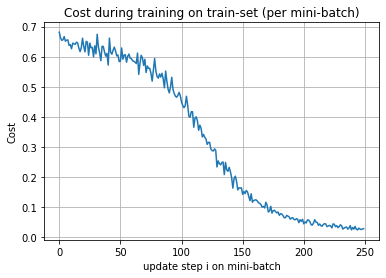

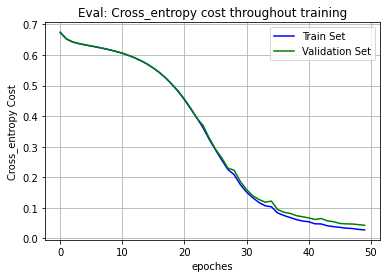

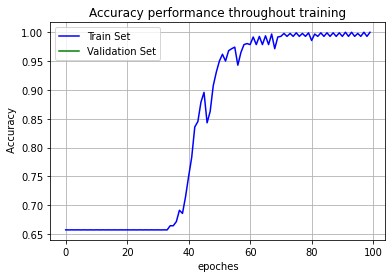

In [22]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.metrics import accuracy_score


######################spliting the dataset ####################
original_data = signal_dataset
size_of_original_data = len(signal_dataset)

train_fraction = 0.70
test_fraction=0.20


train_dataset_size = int(train_fraction * size_of_original_data)
test_dataset_size = int(test_fraction * size_of_original_data)
val_dataset_size = int(size_of_original_data - train_dataset_size -test_dataset_size)

# Split whole original data into train, val and test datsets
train_dataset, val_dataset,test_dataset = torch.utils.data.random_split(original_data,
                                                           [train_dataset_size,
                                                            val_dataset_size,
                                                            test_dataset_size])

train_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True)

######################sfexible model: ######################s
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1=nn.Linear(in_features= 500, out_features=100)
    self.l2=nn.Linear(in_features=100, out_features=20)
    #self.l3=nn.Linear(in_features=12, out_features=5)
    self.output=nn.Linear(in_features=20, out_features=2)
    

    self.relu=nn.ReLU()
    
  def forward(self,x):
    h1=self.relu(self.l1(x))
    h2=self.relu(self.l2(h1))
    #h3 = self.relu(self.l3(h2))
    output=self.output(h2)
    return output

###################################################################
model= Model()
cost_function = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)
###################### the evauate function: ######################s
def evaluate_model_performance(dataset, model):
  d_loader = DataLoader(dataset = dataset, batch_size=len(dataset))
  cost_function=nn.CrossEntropyLoss()
  model.eval()

  with torch.no_grad():
    for x,y in d_loader:
      raw_y_preds=model(x) 
    y_class_preds= raw_y_preds.argmax(dim=1) 
    eval_cost= cost_function(raw_y_preds, y).item()
  model.train()
  eval_acc=accuracy_score(y_pred=y_class_preds,y_true=y)

  return eval_cost, eval_acc

###################### evaluate performance  and track of history of cost and accuracy of train an d val dataset: ######################
training_minibatch_Js=[]
val_cost_l=[]
val_acc_l=[]
trian_cost_l=[]
train_acc_l=[]

nr_epochs=50
for epoch_i in range(nr_epochs):
  #if epoch_i%eval_every_kth ==0:
  model.eval()
  train_cost, train_acc= evaluate_model_performance(model=model, dataset = train_dataset)
  val_cost, val_acc= evaluate_model_performance(model=model, dataset = val_dataset)
  val_cost_l.append(val_cost)
  train_acc_l.append(val_acc)
  trian_cost_l.append(train_cost)
  train_acc_l.append(train_acc)
  model.train()


    
  ###################### training the model( finding hyperparameter of model with using gradient) ######################s
  for signal, label in train_dataloader:
    label_pred = model(signal)
    cost = cost_function(label_pred , label)
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost)
    print(f' in epoch {epoch_i} the last cost of epoch is {training_minibatch_Js[-1]}')

# EVALUATE Model 'performance' on whole train and Validation AND TEST dataset
# test_cost, test_acc= evaluate_model_performance(model=model, dataset = test_dataset)




######################  visualization (plotting trajjectories:)   ######################s

# plotting cost 
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()




# the average cross-entropy
plt.plot(trian_cost_l, label='Train Set', color='b')
plt.plot(val_cost_l, label='Validation Set', color='g')
plt.title('Eval: Cross_entropy cost throughout training')
plt.xlabel('epoches')
plt.ylabel('Cross_entropy Cost')
plt.legend()
plt.grid()
plt.show()

# Plot accuracy
plt.plot(train_acc_l, label='Train Set', color='b')
plt.plot(val_acc_l, label='Validation Set', color='g')
plt.title('Accuracy performance throughout training')
plt.xlabel('epoches')
plt.ylabel(' Accuracy')
plt.legend()
plt.grid()
plt.show()





In [ ]:
with torch.no_grad():
raw_y_preds = model(X) # predict model output for X batch

y_class_preds = raw_y_preds.argmax(dim=1) #compute class labels for each x_n